Early stopping at epoch 339


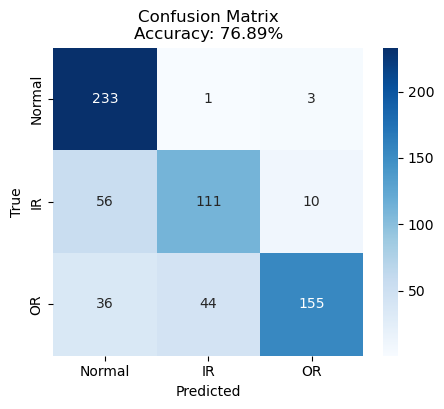

 - Model accuracy: 76.89%


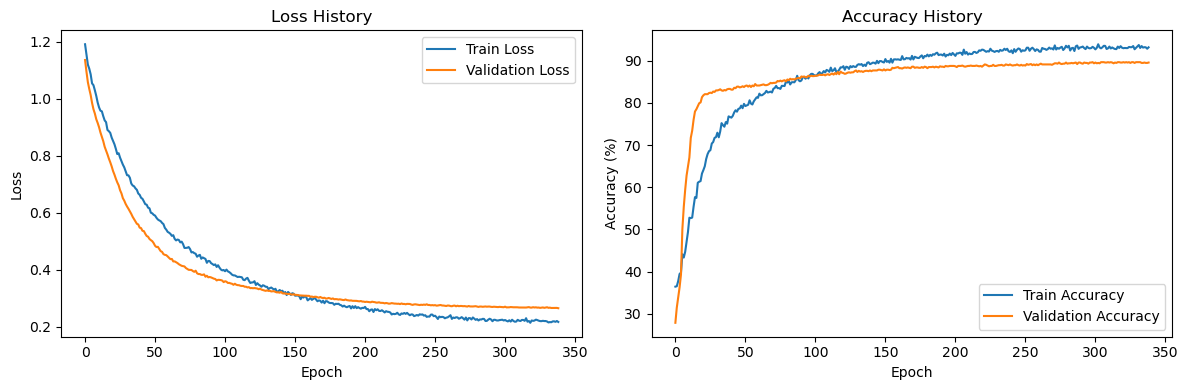

Early stopping at epoch 382


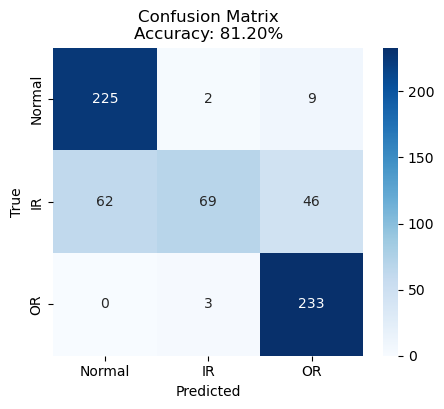

 - Model accuracy: 81.20%


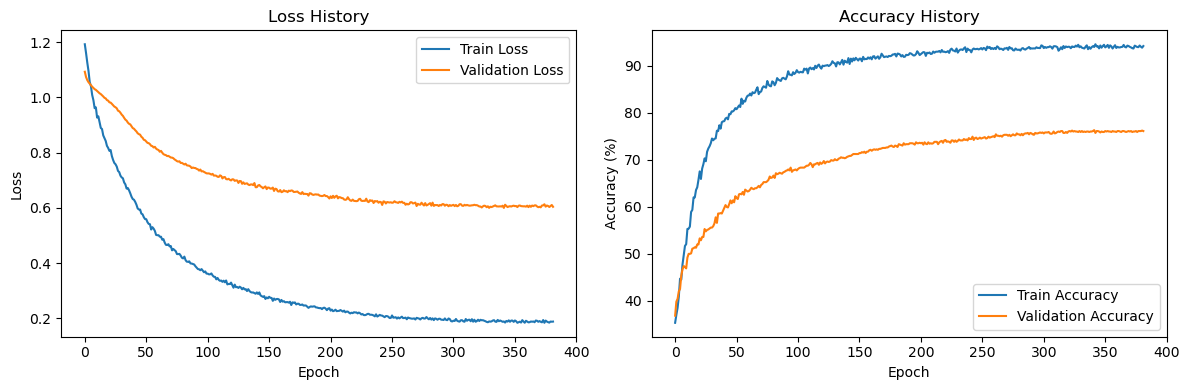

Early stopping at epoch 276


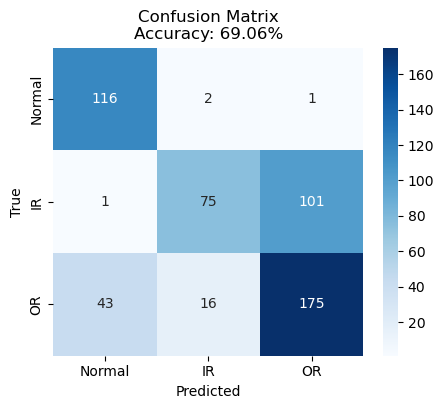

 - Model accuracy: 69.06%


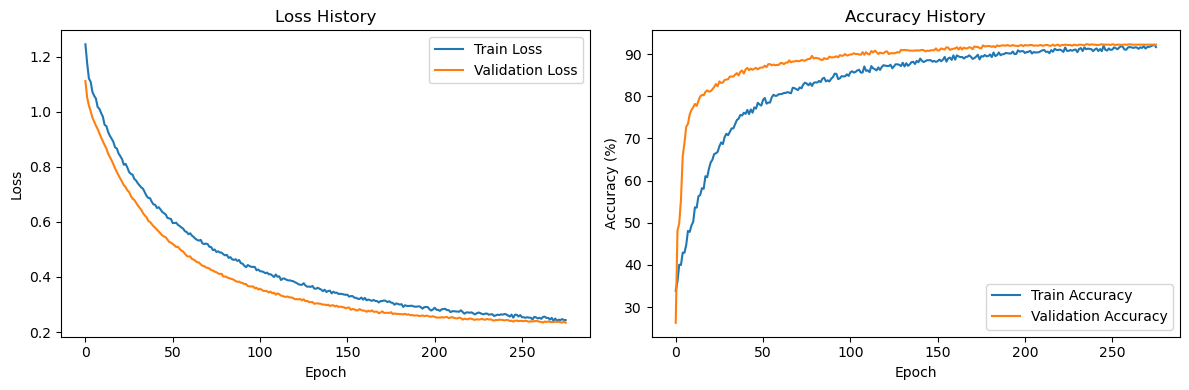

Early stopping at epoch 214


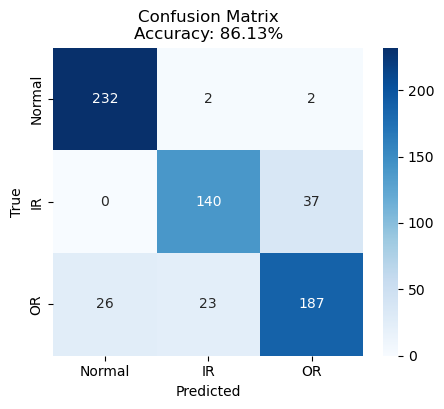

 - Model accuracy: 86.13%


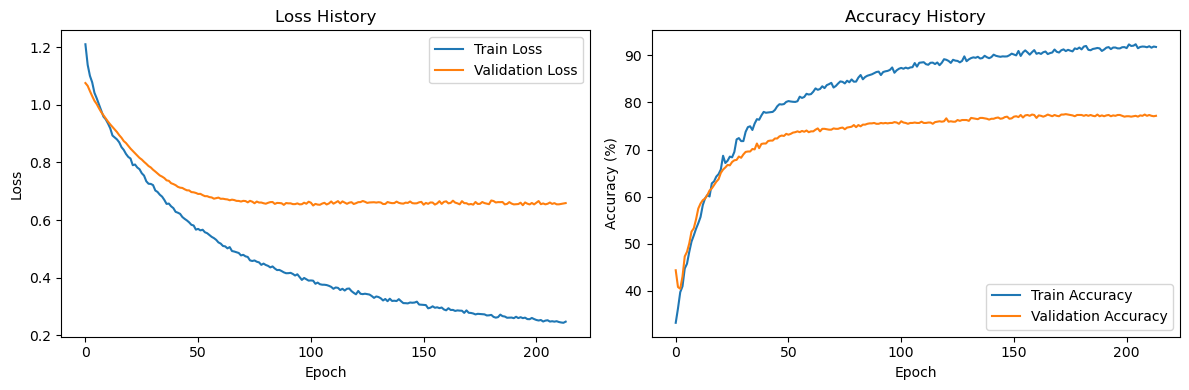

Early stopping at epoch 316


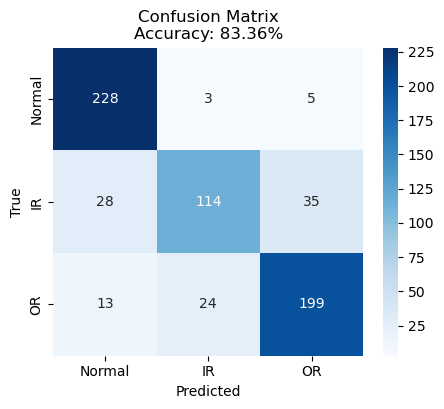

 - Model accuracy: 83.36%


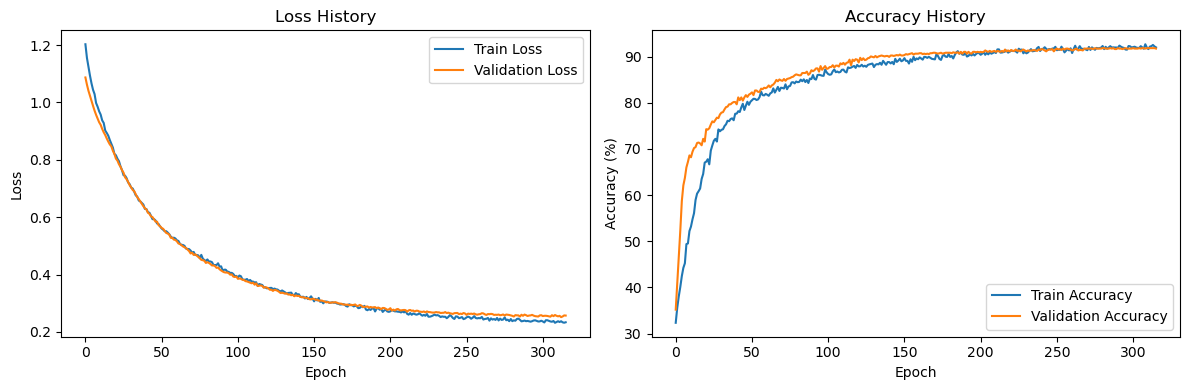

Early stopping at epoch 348


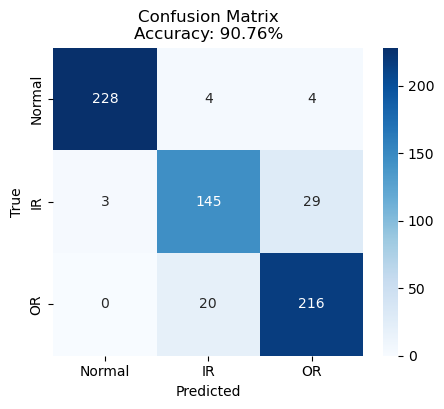

 - Model accuracy: 90.76%


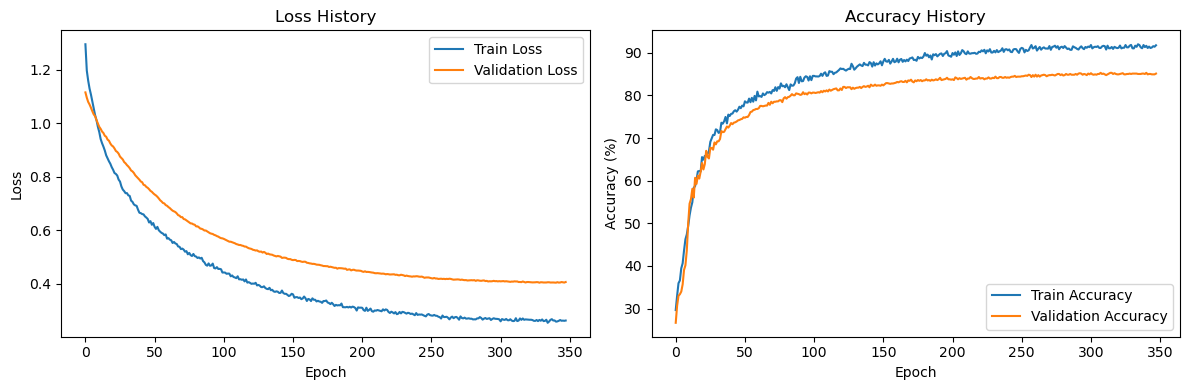

Early stopping at epoch 282


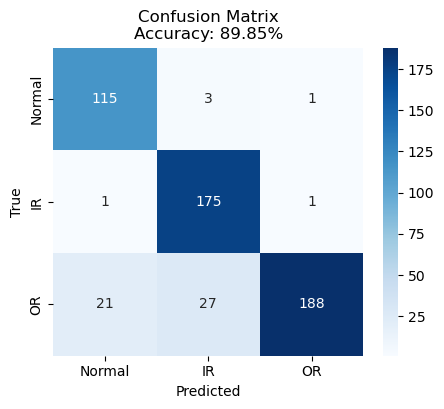

 - Model accuracy: 89.85%


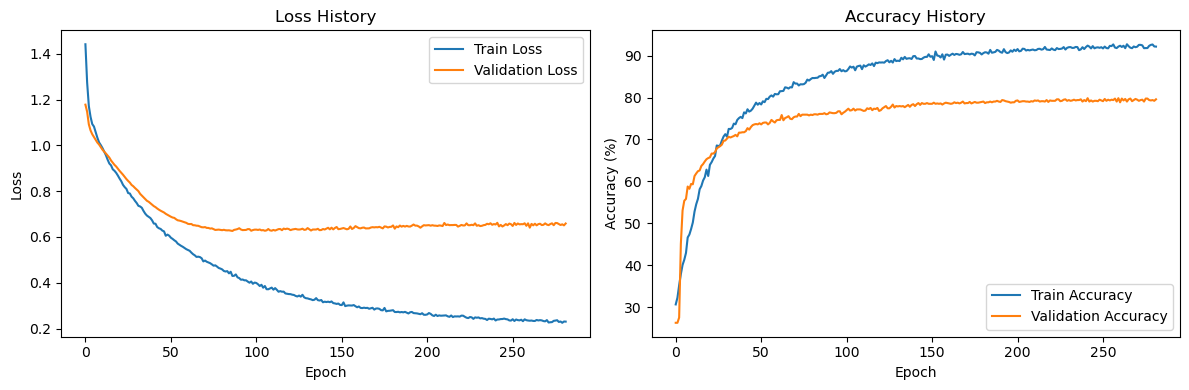

Early stopping at epoch 327


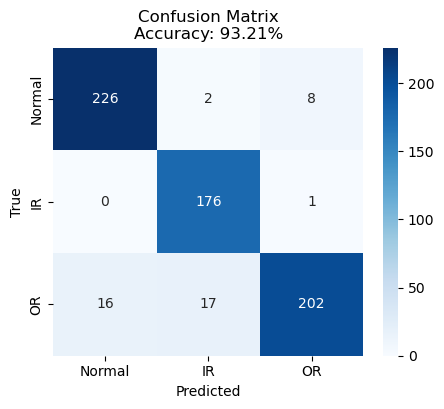

 - Model accuracy: 93.21%


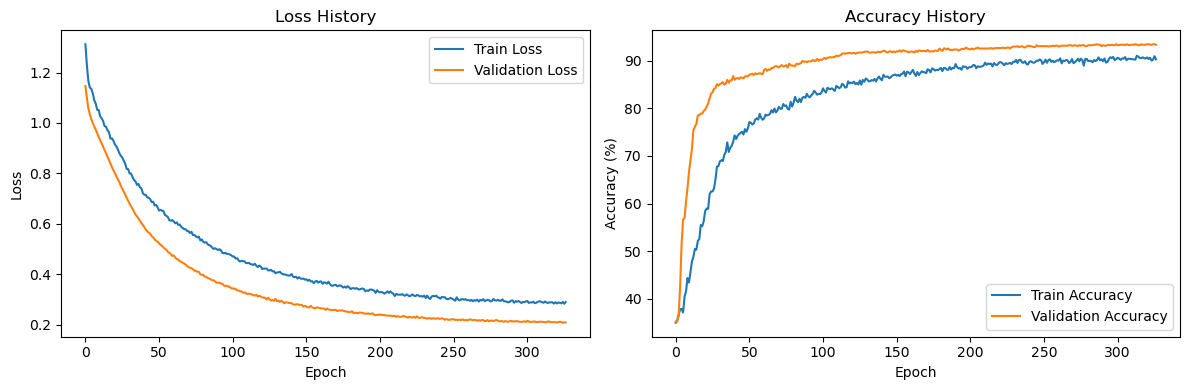

Early stopping at epoch 325


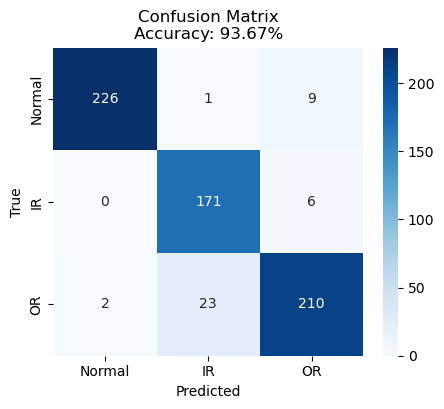

 - Model accuracy: 93.67%


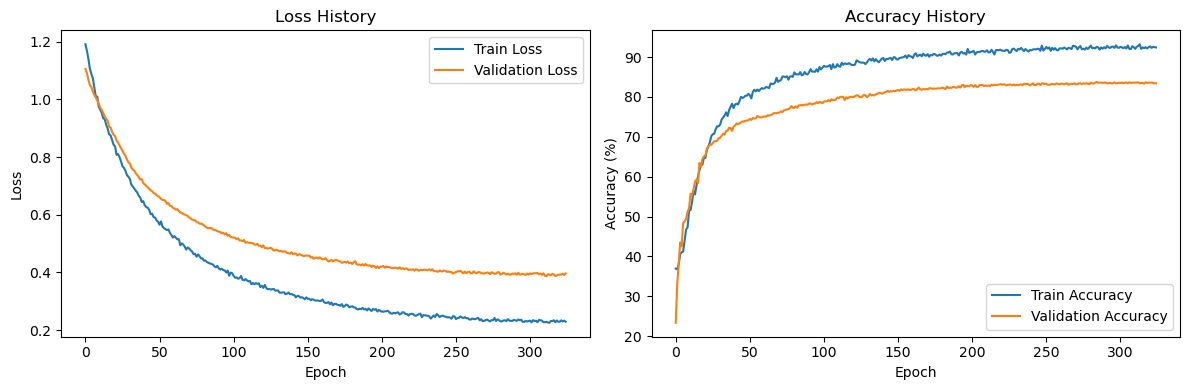

Early stopping at epoch 340


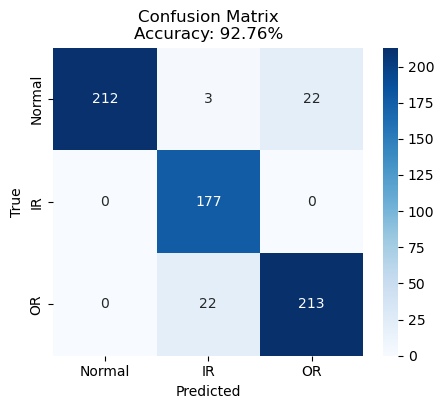

 - Model accuracy: 92.76%


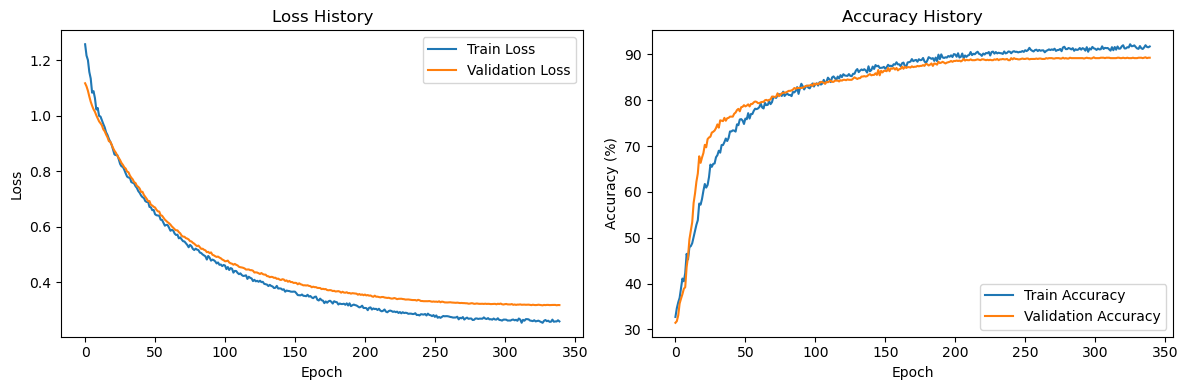

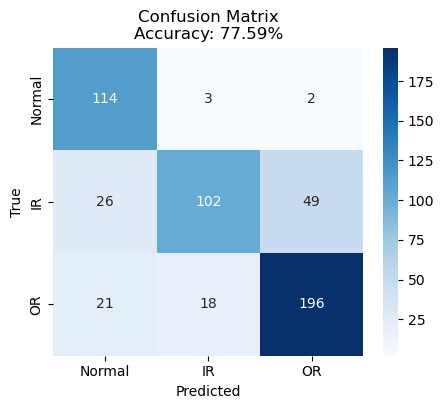

 - Model accuracy: 77.59%


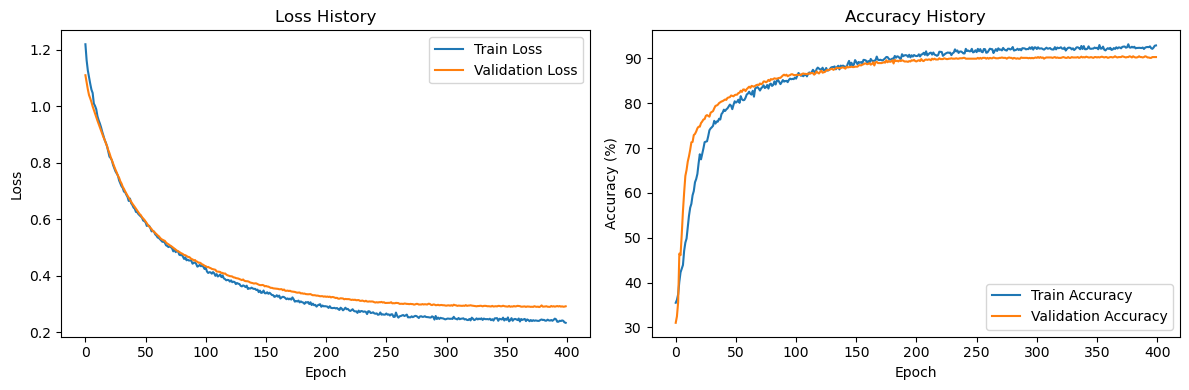

Early stopping at epoch 394


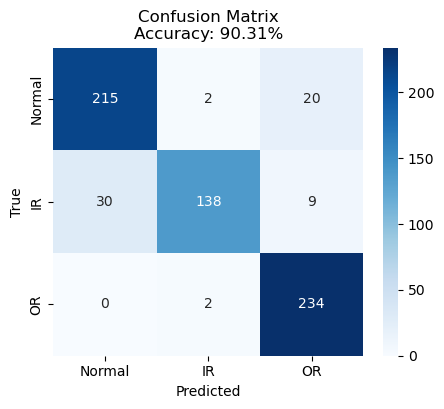

 - Model accuracy: 90.31%


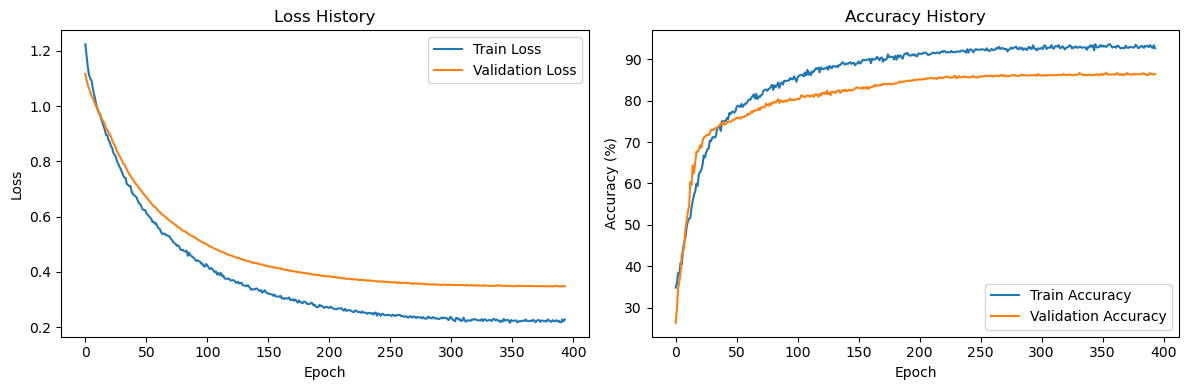

Early stopping at epoch 307


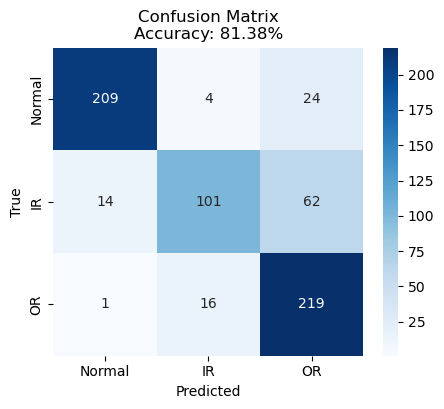

 - Model accuracy: 81.38%


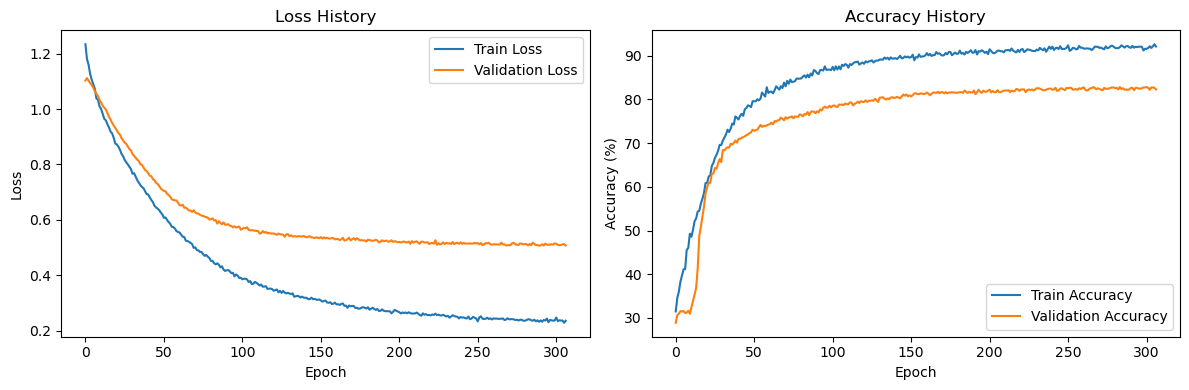

Early stopping at epoch 312


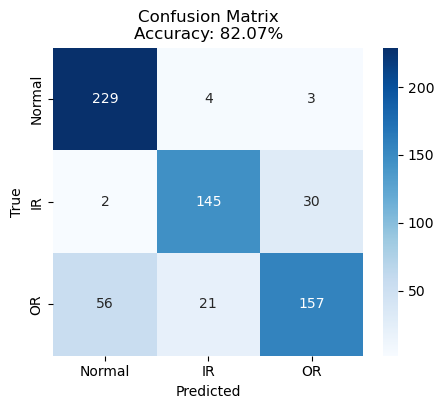

 - Model accuracy: 82.07%


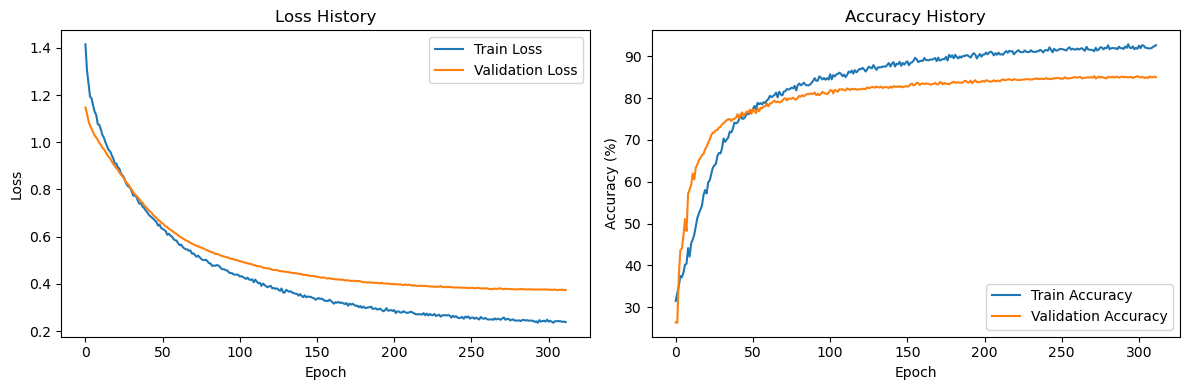

Early stopping at epoch 194


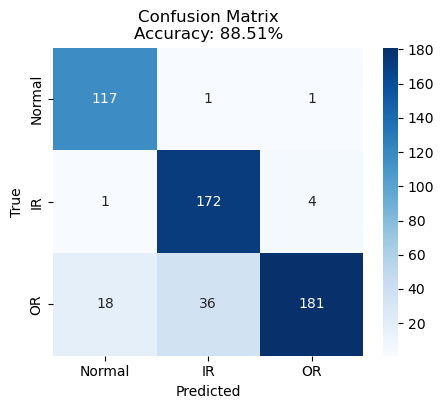

 - Model accuracy: 88.51%


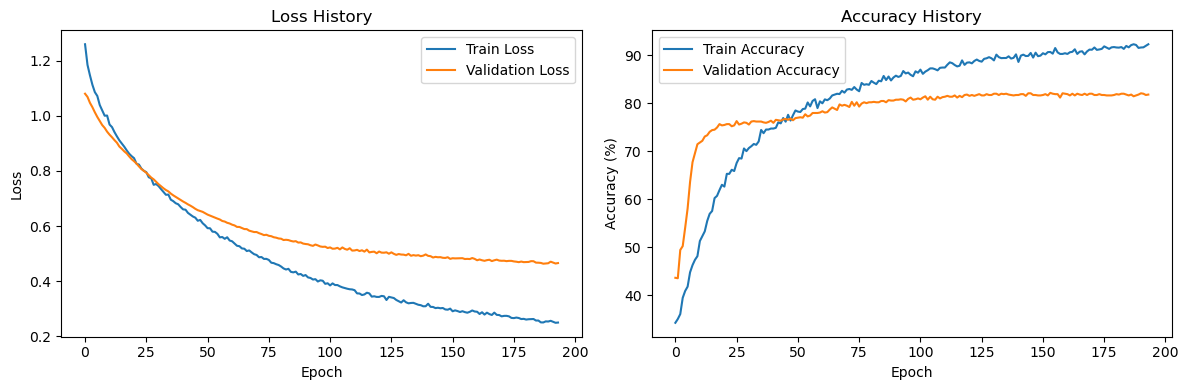

Early stopping at epoch 304


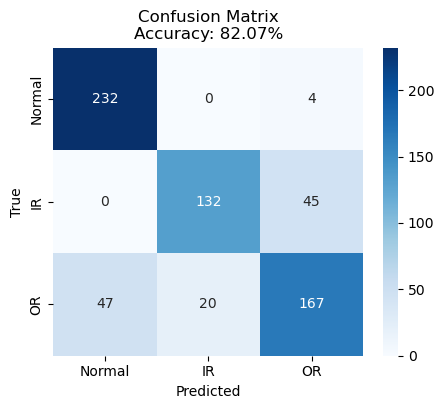

 - Model accuracy: 82.07%


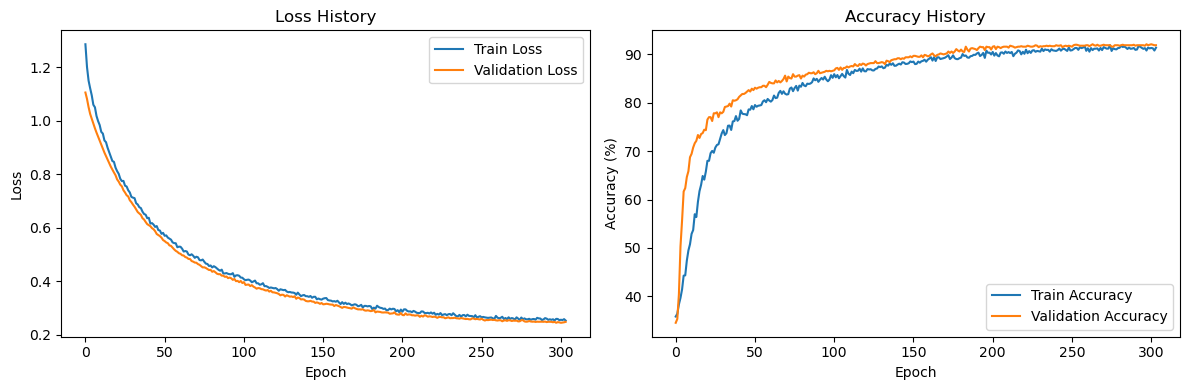

Early stopping at epoch 306


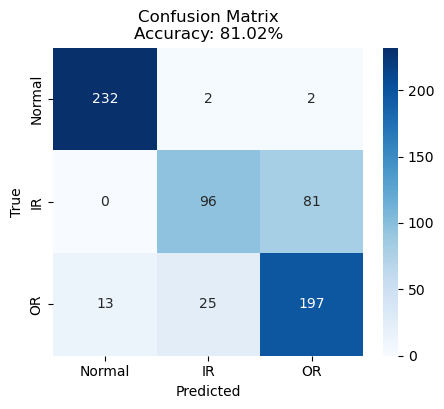

 - Model accuracy: 81.02%


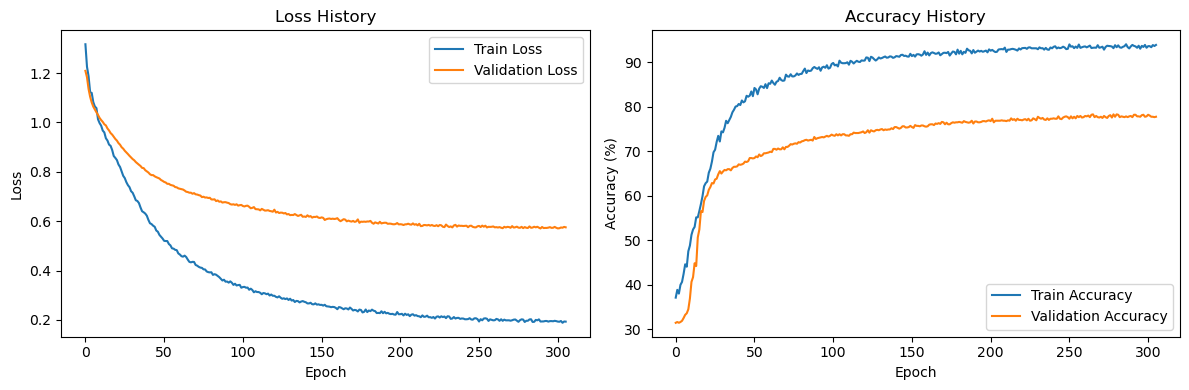

Early stopping at epoch 327


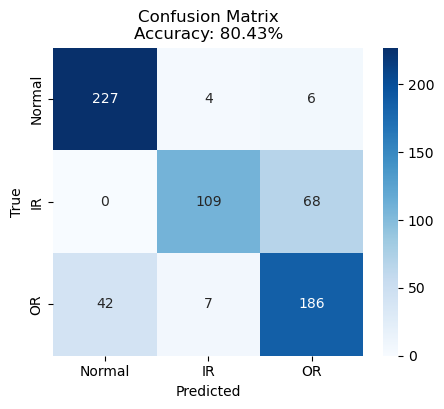

 - Model accuracy: 80.43%


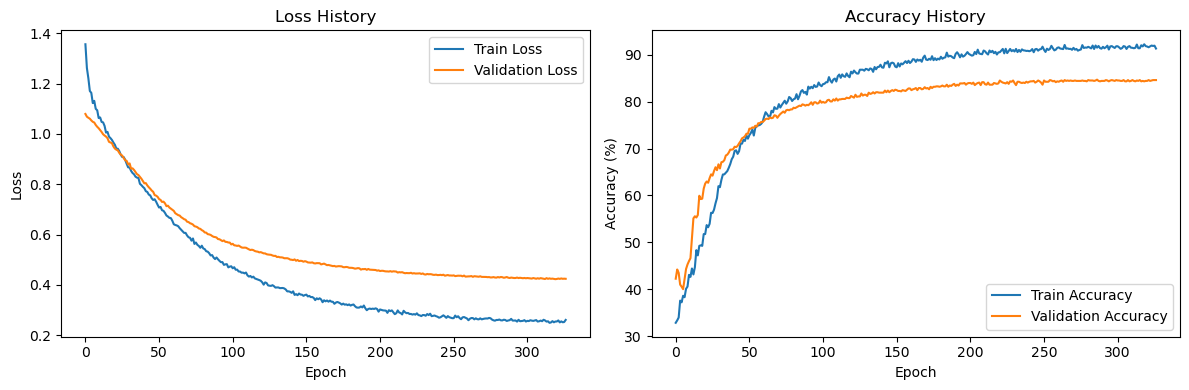

Early stopping at epoch 330


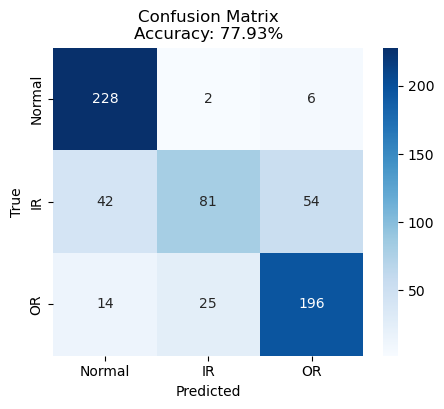

 - Model accuracy: 77.93%


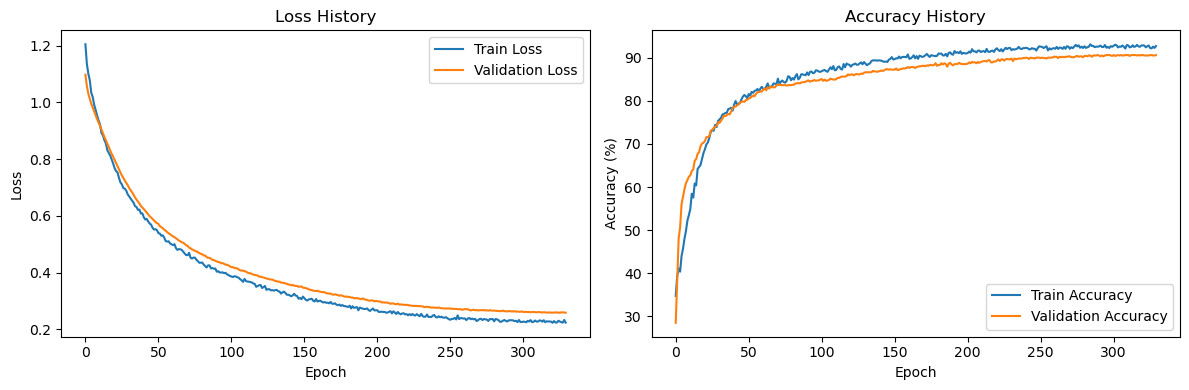

Early stopping at epoch 368


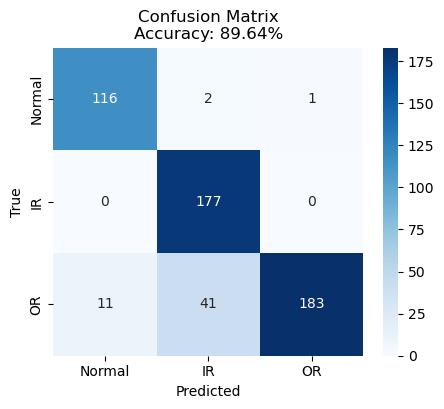

 - Model accuracy: 89.64%


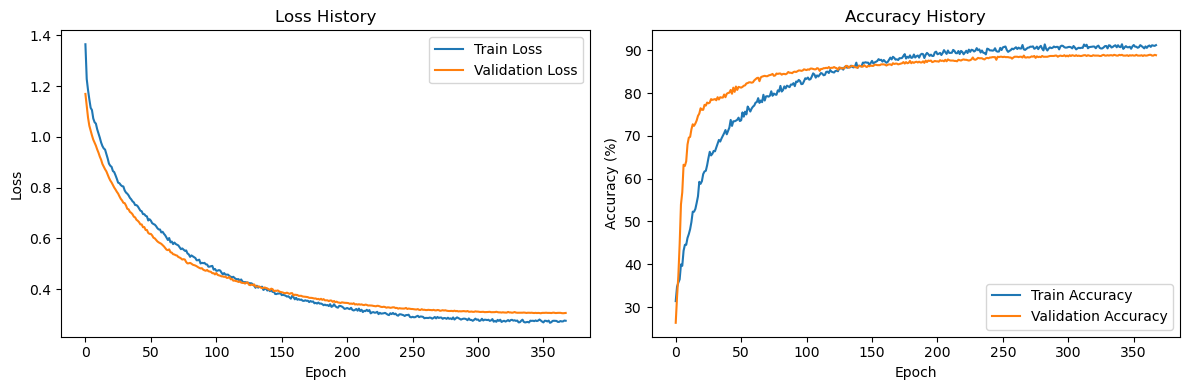

Early stopping at epoch 180


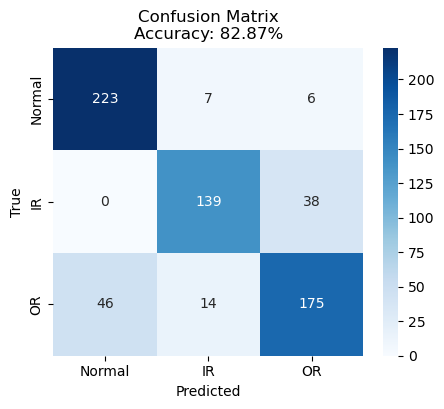

 - Model accuracy: 82.87%


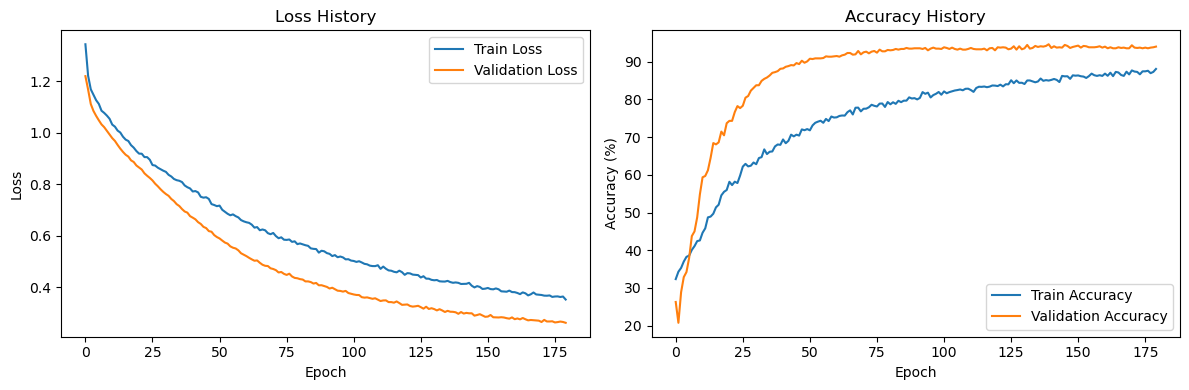

Early stopping at epoch 354


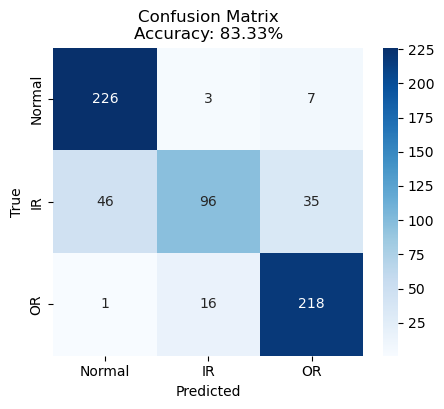

 - Model accuracy: 83.33%


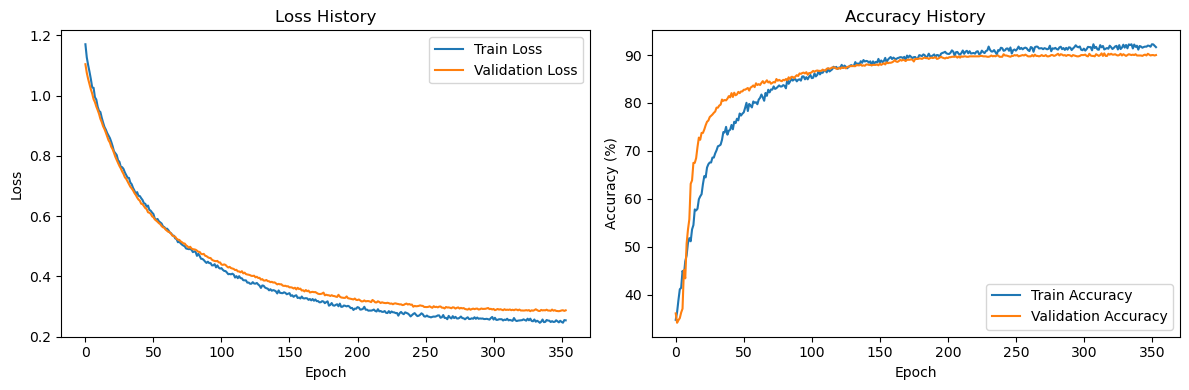

Early stopping at epoch 286


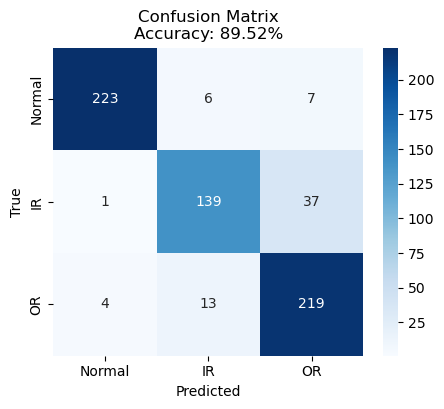

 - Model accuracy: 89.52%


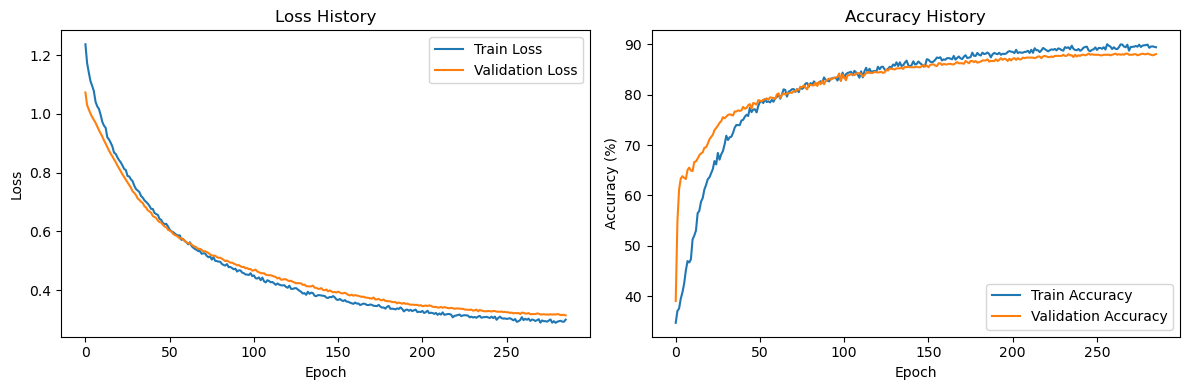

Early stopping at epoch 248


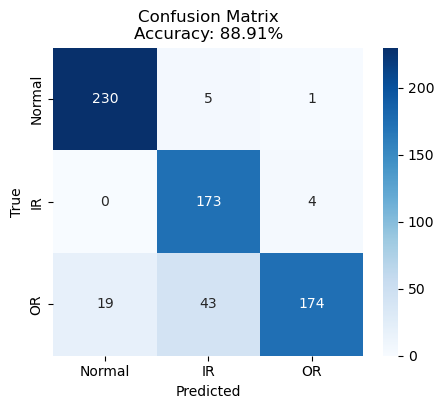

 - Model accuracy: 88.91%


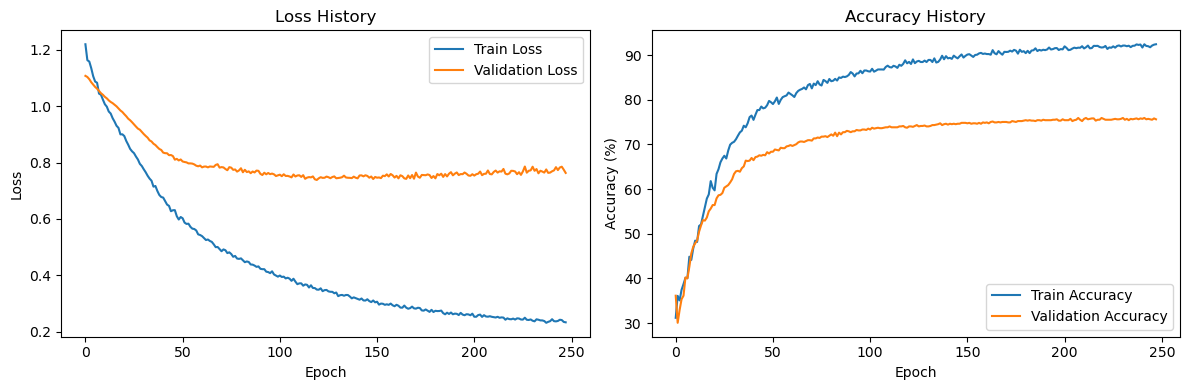

Early stopping at epoch 293


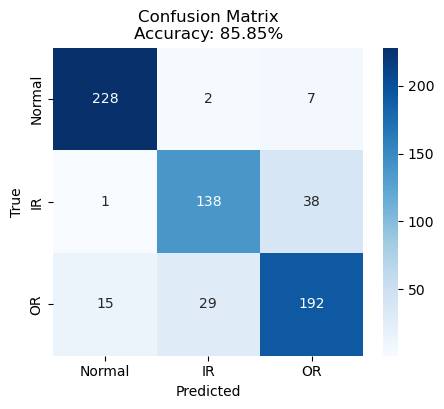

 - Model accuracy: 85.85%


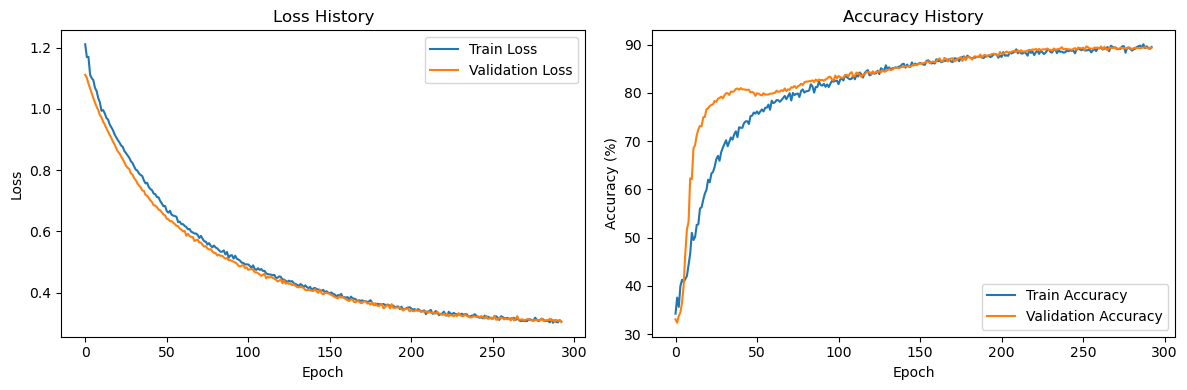

Early stopping at epoch 369


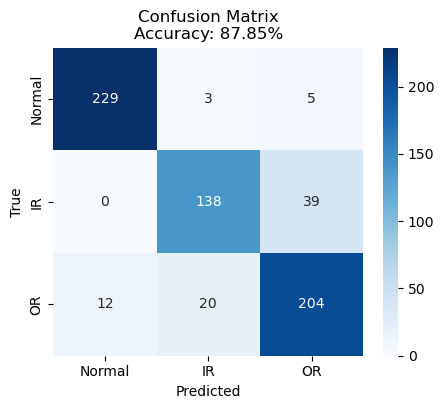

 - Model accuracy: 87.85%


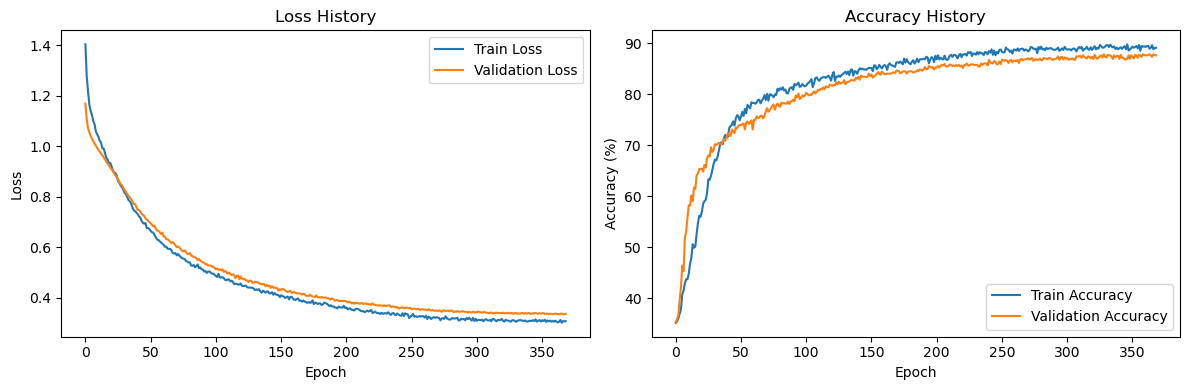

Early stopping at epoch 269


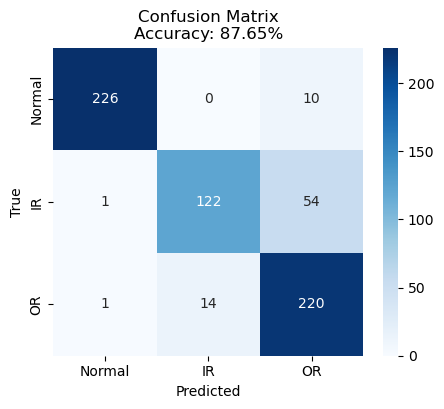

 - Model accuracy: 87.65%


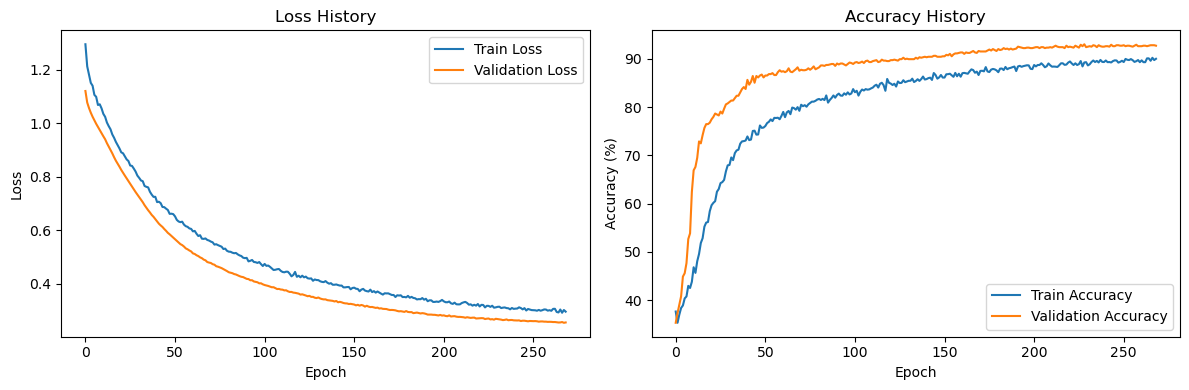

Early stopping at epoch 390


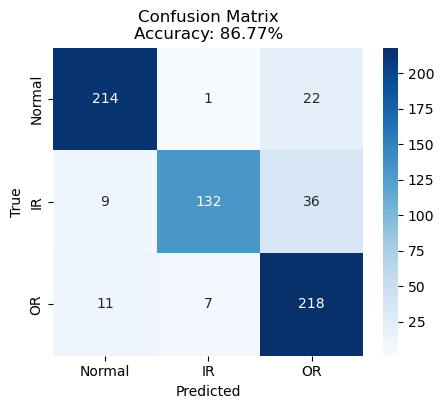

 - Model accuracy: 86.77%


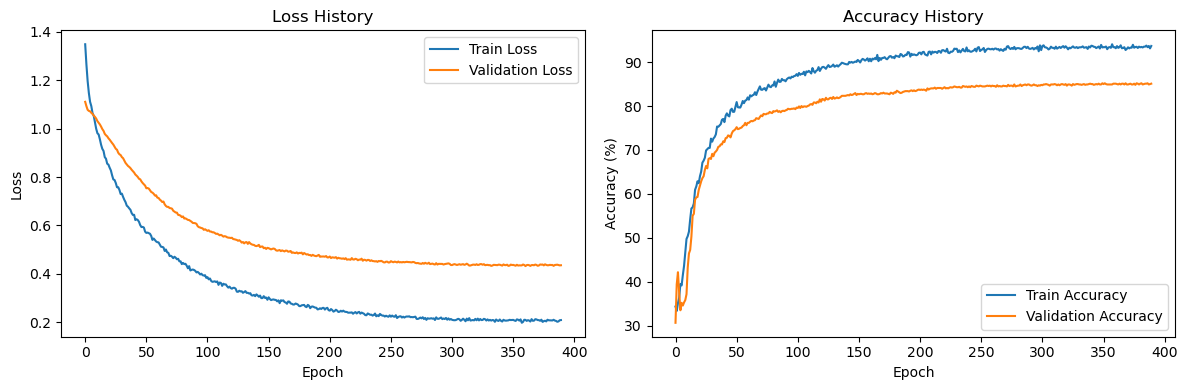

Early stopping at epoch 270


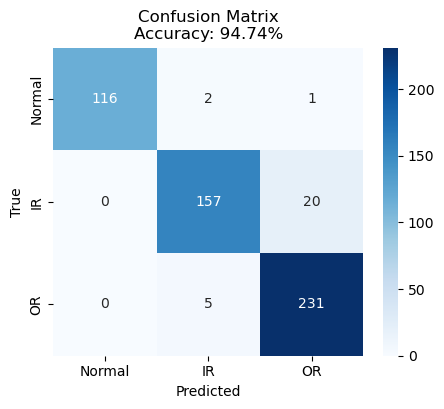

 - Model accuracy: 94.74%


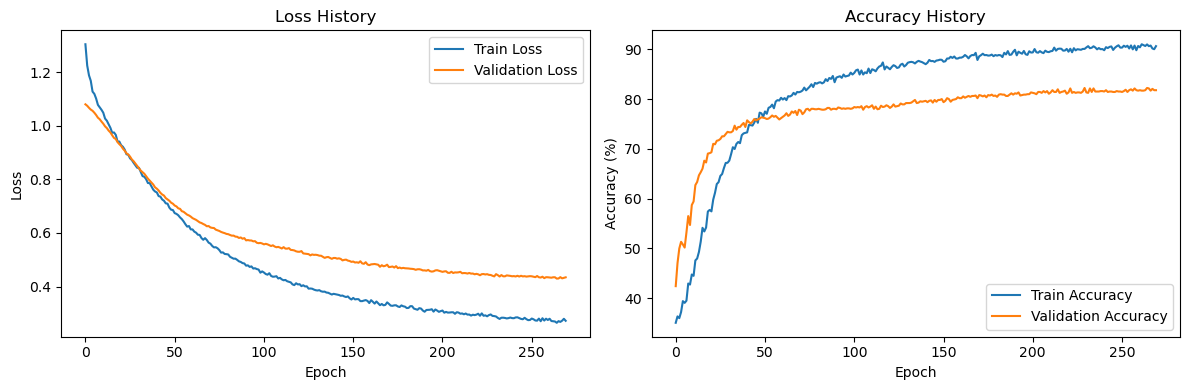

Early stopping at epoch 373


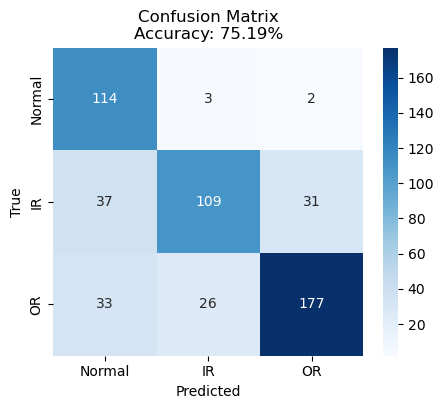

 - Model accuracy: 75.19%


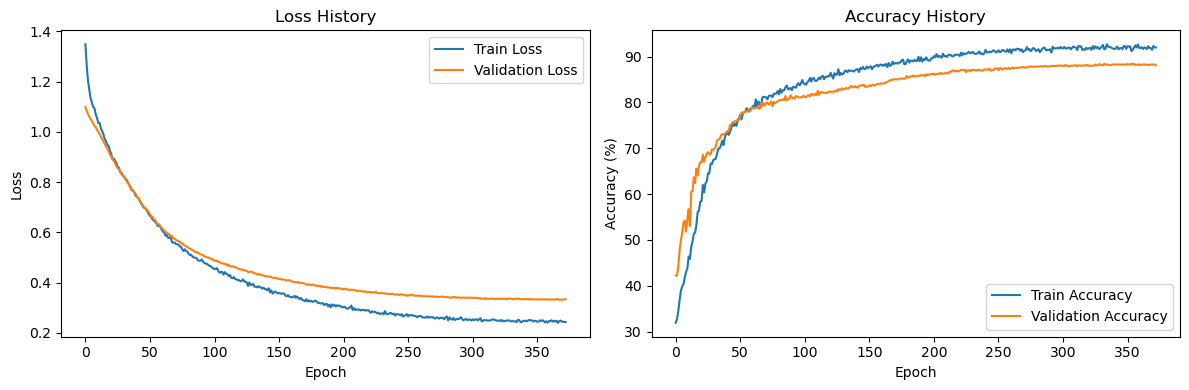

Mean accuracy: 0.8501720310995129
Std accuracy: 0.06013374854222321


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='log', epsilon=1e-12)
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))